# Big Mart Sales Practice Problem in India

Source : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')
train.shape

(8523, 12)

- 훈련 데이터의 크기는 8523개이며 총 12개의 컬럼으로 구성되어 있다.
데이터의 내용은 아래와 같다. 여기서 예측하고자 하는 목적 변수는 Item_Outlet_Sales이다.

In [3]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


- 훈련 데이터의 정보를 보면 아래와 같으며 Item_Weight와 Outlet_Size에 결측치가 많은 것을 알 수 있다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## 두 개의 입력 특성만 사용

 - 우선 입력 특성으로 구 개만 사용하여 선형회귀 모델을 만들어 보겠다.
 입력으로 매장 개장 연도와 가격, 'Outlet_Establishment_Year'와 'Item_MRP'를 선택하여 변수 X에 담는다.


In [5]:
X = train.loc[:,['Outlet_Establishment_Year', 'Item_MRP']]

- 선형회귀 모델을 만들고 목적 변수로 train.Item_Outlet_Sales를 지정하여 훈련, 검증 데이터를 나누었다.
- 오차 자승의 평균, MSE를 계산하고 이의 루트 값인 RMSE(Root Mean Square Error)를 구하였다. RMSE를 보면 단위가 매출 액수가 되어 평균 오차가 얼마나 발생했는지를 파악하기가 쉽다.

In [55]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X, train.Item_Outlet_Sales, test_size=0.3)
lreg.fit(x_train, y_train)
pred = lreg.predict(x_test)
# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse 출력
mse, mse**(0.5)

(1329275.3244952224, 1152.9420299803553)

- 위의 결과를 보면 평균 오차자승의 제곱근 값이 약 1,470인 것을 알 수 있다.
- 선형회귀 모델의 계수를 출력해 보면 다음과 같다.

In [9]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


- 위의 결과를 보면 목적변수와 Item_MRP는 양의 비례 관계에 있고 매장 설립연도와는 음의 비례 관계인 것을 알 수 있다.
- 상품 추천가격 Item_MRP와 목적 변수의 관계를 산포도로 그리면 다음과 같다.

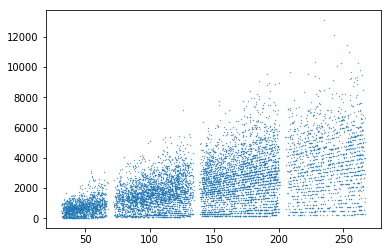

In [10]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=0.1)

- 매장 설립연도와 목적변수의 관계를 산포도로 그리면 다음과 같다.

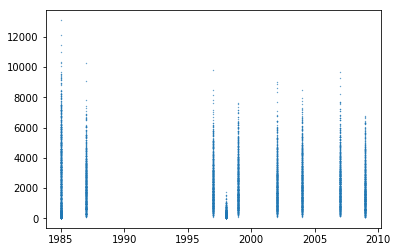

In [11]:
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales, s=0.1)

- 회귀 모델의 성능 평가를 score 함수로 알 수 있으며 R-square값을 리턴한다. 아래 결과를 보면 이 모델이 분산의 32%를 설명하는것을 알 수 있다.

In [12]:
lreg.score(x_test, y_test)

0.3242020337746537

## 모든 입력 특성을 사용

- 주어진 모든 입력 특성을 사용하는 경우의 성능을 살펴보겠다.
- 먼저 각 특성에서 결측치가 얼마나 많은지를 다음과 같이 확인할 수 있다.
아래를 각열에 대해서 결측치의 개수를 세는 코드이다.

In [13]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 데이터 전처리
- 먼저 상품의 무게에 결측치가 많으며 1,463개의 샘플에서 결측치가 발생했다. 결측치가 있는 항목을 모두 버리면 데이터의 손실이 많으므로 결측치를 상품 무게의 평균치로 대체하겠다.

In [14]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

- 상품의 가시성은 결측치는 아니지만 많은 데이터가 값이 0으로 되어있다.
'0'은 실제로는 결측치로 보고 평균치로 대체하였다.

In [15]:
train.Item_Visibility.value_counts().head(10)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
Name: Item_Visibility, dtype: int64

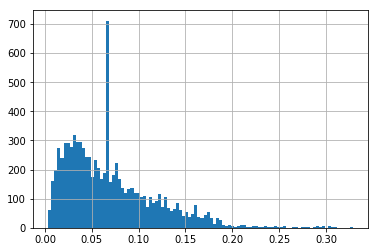

In [24]:
train.Item_Visibility.hist(bins=100)

- 값이 0인 항목을 모두 평균치로 대체한 경우의 분포를 다시 그리면 다음과 같다.

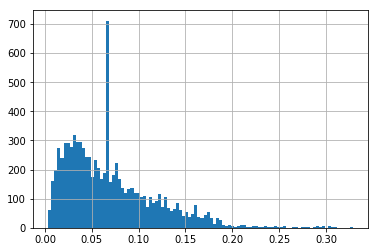

In [18]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train.Item_Visibility.hist(bins=100)

- 설립연도의 분포를 보면 다음과 같다.

In [19]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

- 이를 히스토그램을 그리면 다음과 같다.

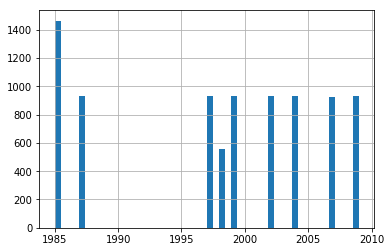

In [20]:
train.Outlet_Establishment_Year.hist(bins=50)

- 데이터 전처리에서 설립연도의 절대값을 사용하는 것보다, 설립된 지 몇년이 지났는지의 값을 사용하는 것이 더 의미있는 선형적인 관계를 가질 것으로 판단하여 설립연도를 설립 후 경과한 연수로 바꾸어 표현하였다.

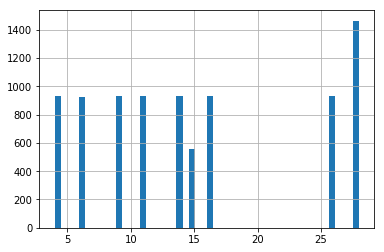

In [21]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train.Outlet_Establishment_Year.hist(bins=50)

- 매장의 크기를 구분하는 Outlet_Size 특성에 결측치가 많이 발생하였는데 (총 2,410개) 이의 분포를 보면 다음과 같다.

In [25]:
train.Outlet_Size.isnull().sum()

2410

In [26]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- 결측치가 발생한 경우는 모두 소형매장 'Small'로 대체하였다.

In [27]:
train['Outlet_Size'].fillna('Small',inplace=True)

- 이제 모든 결측치가 처리된 것을 확인해보겠다.

In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- 상품명(Item_Identifier)은 분석하기 전에 입력 특성에서 제외해야 한다.

In [29]:
train.drop("Item_Identifier", axis=1, inplace=True)

## 카테코리 인코딩

- 선형회귀 모델의 입력 변수로 카테고리 값은 원 핫 인코딩으로 처리해 주어야 한다. 먼저 카테고리 변수를 찾아내기 위해서 데이터 타입이 object인 변수들 목록을 다음과 같이 object_list에 저장했다.

In [30]:
object_list = list(train.select_dtypes(include = ['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

- 이 특성 값들을 모두 원핫 인코딩하기 위해서 get_dummies()함수를 사용한다.

In [31]:
dummies = pd.get_dummies(train[object_list], prefix = object_list)
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Fat_Content_low fat,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0


- 원래의 카테고리 열을 삭제하고 이를 다른 이름의 X1데이터 프레임에 저장한다.

In [32]:
X1 = train.drop(object_list, axis=1)
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


- 목적 변수 Item_Outlet_Sales는 y에 저장하고 입력 특성에 변수에서 삭제한다.

In [33]:
y = X1.Item_Outlet_Sales
X1 = X1.drop('Item_Outlet_Sales', 1)

- 이제 X1 데이터프레임에 앞에서 만든 dummies 데이터프레임을 합치면 (열의 방향으로 합쳐야 함.), 모든 입력 특성 변수를 포함하는 데이터프레임을 얻는다.

In [34]:
X = pd.concat([X1, dummies], axis=1)

- dummies, X1, X 데이터프레임의 모양을 보면 다음과 같다.

In [35]:
dummies.shape, X1.shape, X.shape

((8523, 41), (8523, 4), (8523, 45))

## 4개의 특성만 사용하는 경우
- 4개의 실수로 된 특성만 사용하는 경우의 RMSE 값과 성능(R square)값을 보면 두 개의 특성만 사용한 경우의 0.32에서 성능이 약간 개선되어 0.34인 것을 알 수 있다.

In [36]:
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)
lreg.fit(x_train, y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test -y_test)**2)
print(mse**0.5)
print(lreg.score(x_test, y_test))

1387.9151553183913
0.3459348199771225


- 카테고리 변수 41개를 포함하여 45개의 모든 특성을 사용하는 경우의 성능은 아래와 같이 0.548로 개선되었다. RMSE값도 1152로 감소하였다. (입력 변수로 X1대신 X를 지정하였다.)

In [39]:
# 45개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lreg.fit(x_train, y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test, y_test))

1152.9420299803553
0.5486534404110445


## 오차 플롯
- 예측값에 대해서 각각 발생하는 오차를 그려보면 오차의 발생 형태가 랜덤하지 않고 비선형인 성분이 많은 것을 알 수 있다.(아래 그림에서 오차의 절대값이 아니라 양수와 음수 값을 그대로 표현함)

Text(0.5, 1.0, 'Residual plot')

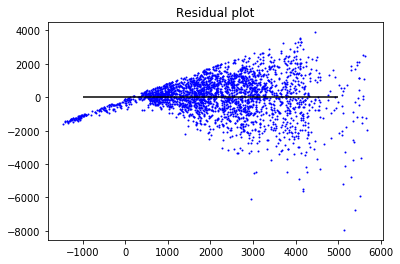

In [40]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

- 전체 45개 특성의 계수의 크기를 나열해보면 다음과 같다. 음과 양의 관계를 볼 수 있다.

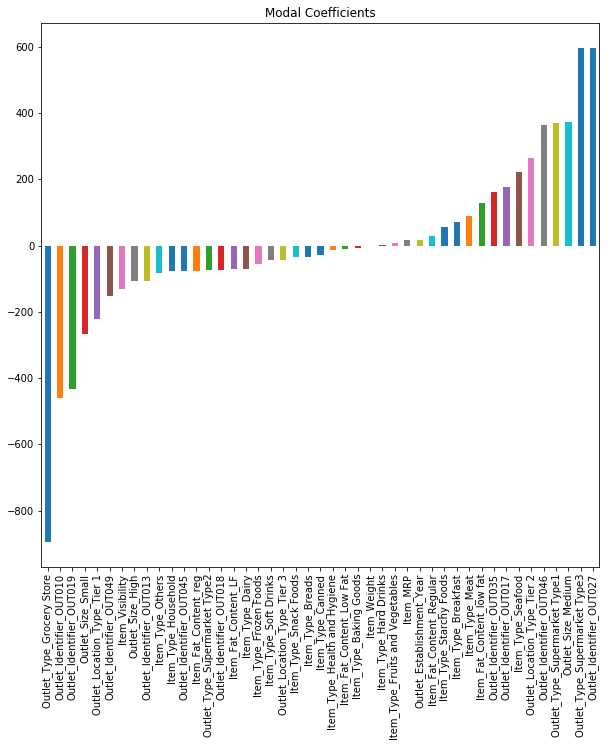

In [41]:
plt.figure(figsize=(10,10))
predictors = X.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

## 릿지 규제
- 릿지 규제를 사용한 선형회귀를 수항하면 다음과 같은 결과를 얻는다.

In [42]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train, y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1152.9420299803553, 0.5491731608147644)

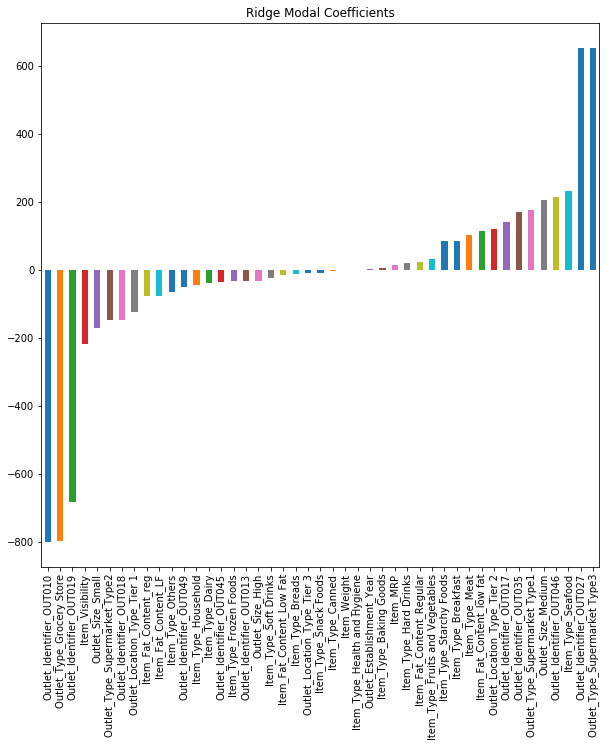

In [43]:
plt.figure(figsize=(10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

- 위 결과를 보면 큰 계수의 값이 줄어든 것을 알 수 있다. 여러가지 하이퍼 파라미터에 대한 성능을 비교하면 다음과 같다.

In [45]:
alpha = [0.001,0.01,0.05,0.5,1]
for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train, y_train)
    print("a=", a, "R square =", ridgeReg.score(x_test, y_test))

a= 0.001 R square = 0.5486826382589223
a= 0.01 R square = 0.5489082444202531
a= 0.05 R square = 0.5491731608147644
a= 0.5 R square = 0.5137188639777166
a= 1 R square = 0.45920700914344165


## 라쏘 규제
- 아래는 라쏘 규제를 수행한 선형회귀 모델이다. 릿지 규제와 달리 작은 값의 계수들의 영향이 줄어든 것을 알  수 있다. 성능은 비슷하게 나온다.

In [52]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train, y_train)
print(lassoReg.score(x_test,y_test))

0.5493981055951234


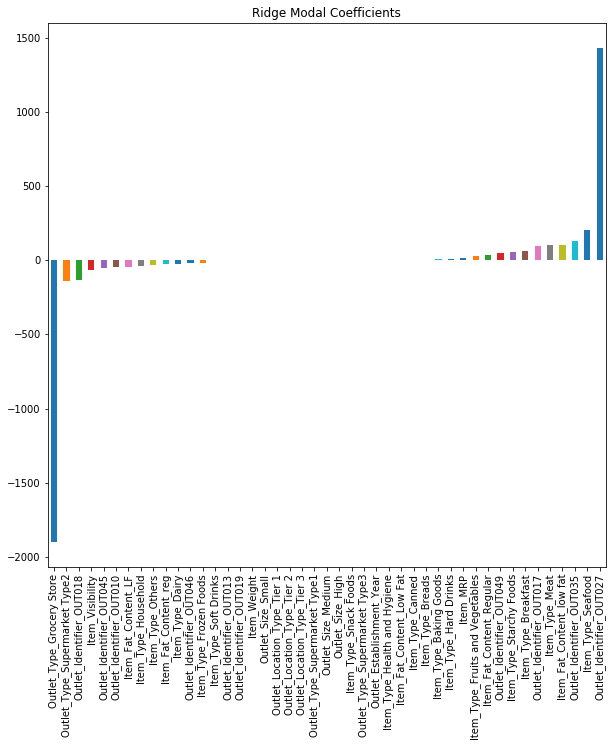

In [53]:
plt.figure(figsize=(10,10))
predictors = X.columns
coef = Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

- 위의 결과를 보면 중요도가 적은 파라미터(계수)의 크기가 줄어든 것을 알 수 있다. 모델의 성능은 거의 비슷하다.